<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.8 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.8 MB 1.6 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.8 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.8 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/9.8 MB 1.8 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.8 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/9.8 MB 1.9 MB/s eta 0:00:04
   ----------------- ---------------------- 4.2/9.8 MB 2.0 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.0 MB/s eta 0:00:03
   -------------------- ---------

In [ ]:
    import yfinance as yf
import pandas as pd
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots

IndentationError: unexpected indent (1901662633.py, line 1)

In [ ]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [2]:
# Question 1: Use yfinance to Extract Tesla Stock Data
import yfinance as yf
import pandas as pd

def extract_tesla_stock_data():
    try:
        # Create ticker object for Tesla
        tesla_ticker = yf.Ticker("TSLA")
        
        # Extract historical data with max period
        tesla_data = tesla_ticker.history(period="max")
        
        # Reset index and convert Date to datetime
        tesla_data.reset_index(inplace=True)
        tesla_data['Date'] = pd.to_datetime(tesla_data['Date']).dt.date
        
        # Display information about the data
        print("Tesla Stock Data Info:")
        print(f"Shape: {tesla_data.shape}")
        print(f"Date Range: {tesla_data['Date'].min()} to {tesla_data['Date'].max()}")
        print(f"Columns: {list(tesla_data.columns)}")
        
        # Display first 5 rows with proper formatting
        print("\nFirst 5 rows of Tesla Stock Data:")
        display(tesla_data.head().style.set_caption("Tesla Stock Data - First 5 Rows"))
        
        return tesla_data
    
    except Exception as e:
        print(f"Error extracting Tesla stock data: {e}")
        return None

# Execute Question 1
tesla_data = extract_tesla_stock_data()

Tesla Stock Data Info:
Shape: (3833, 8)
Date Range: 2010-06-29 to 2025-09-23
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

First 5 rows of Tesla Stock Data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.000000,0.000000
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.000000,0.000000
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.000000,0.000000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.000000,0.000000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.000000,0.000000


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [3]:
# Question 1: Use yfinance to Extract Tesla Stock Data

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Using the ticker object and the history function extract stock information
# Set the period parameter to "max" to get information for the maximum amount of time
tesla_data = tesla.history(period="max")

# Display information about the extracted data
print("Tesla Stock Data extracted successfully!")
print(f"Data shape: {tesla_data.shape}")
print(f"Date range: {tesla_data.index.min()} to {tesla_data.index.max()}")
print(f"Columns: {list(tesla_data.columns)}")

# Show the first few rows
print("\nFirst 5 rows of Tesla stock data:")
print(tesla_data.head())

Tesla Stock Data extracted successfully!
Data shape: (3833, 7)
Date range: 2010-06-29 00:00:00-04:00 to 2025-09-23 00:00:00-04:00
Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

First 5 rows of Tesla stock data:
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [4]:
# =============================================================================
# QUESTION 1: COMPLETE CODE WITH RESET INDEX AND HEAD DISPLAY
# =============================================================================

# Step 1: Create ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Step 2: Extract stock data with maximum period
tesla_data = tesla.history(period="max")

# Step 3: Reset the index using reset_index(inplace=True)
tesla_data.reset_index(inplace=True)

# Step 4: Display the first five rows
print("=== QUESTION 1: TESLA STOCK DATA ===")
print(f"DataFrame Shape: {tesla_data.shape}")
print(f"Columns: {list(tesla_data.columns)}")
print("\nFirst 5 rows of Tesla Stock Data:")
print("=" * 80)

# Display first 5 rows with nice formatting
display(tesla_data.head())

# Alternative display without using display() function
print("\nAlternative display (first 5 rows):")
print(tesla_data.head().to_string(index=False))

print("=" * 80)

=== QUESTION 1: TESLA STOCK DATA ===
DataFrame Shape: (3833, 8)
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

First 5 rows of Tesla Stock Data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0



Alternative display (first 5 rows):
                     Date     Open     High      Low    Close    Volume  Dividends  Stock Splits
2010-06-29 00:00:00-04:00 1.266667 1.666667 1.169333 1.592667 281494500        0.0           0.0
2010-06-30 00:00:00-04:00 1.719333 2.028000 1.553333 1.588667 257806500        0.0           0.0
2010-07-01 00:00:00-04:00 1.666667 1.728000 1.351333 1.464000 123282000        0.0           0.0
2010-07-02 00:00:00-04:00 1.533333 1.540000 1.247333 1.280000  77097000        0.0           0.0
2010-07-06 00:00:00-04:00 1.333333 1.333333 1.055333 1.074000 103003500        0.0           0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [9]:
# Use the requests library to download the webpage
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Find the Tesla Revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("table").find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean Revenue column
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Show last 5 rows
print(tesla_revenue.tail())


    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [10]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse HTML using html.parser (or html5lib)
soup = BeautifulSoup(html_data, "html.parser")  # or use "html5lib"

# Extract Tesla Revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("table").find("tbody").find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = pd.concat(
            [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
            ignore_index=True
        )

# Clean Revenue column
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Show sample
print(tesla_revenue.head())


   Date  Revenue
0  2021  53823.0
1  2020  31536.0
2  2019  24578.0
3  2018  21461.0
4  2017  11759.0


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [12]:
# Requires: requests, beautifulsoup4, (optional: html5lib), pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def fetch_quarterly_revenue(url, parser='html.parser', company_keyword='tesla'):
    """
    Fetch a Date/Revenue DataFrame from a webpage containing one or more tables.
    - url: page to download
    - parser: 'html.parser' or 'html5lib'
    - company_keyword: used to help find the correct table (e.g. 'tesla')
    Returns: pandas.DataFrame with columns ['Date','Revenue'] (Revenue as float)
    """

    # Step 1: Create an empty container for rows
    rows = []

    # Step 2: Download the page
    resp = requests.get(url)
    resp.raise_for_status()
    html_data = resp.text

    # Step 3: Parse HTML with the chosen parser
    soup = BeautifulSoup(html_data, parser)

    # Step 4: Find candidate tables and try to identify the Tesla Quarterly Revenue table
    tables = soup.find_all('table')
    target_table = None

    # Heuristic 1: look for nearby text (headings/caption) + headers containing 'revenue' and company name
    for table in tables:
        header_text = ' '.join([th.get_text(" ", strip=True).lower() for th in table.find_all('th')])
        prev_text = ''
        prev = table.find_previous(lambda t: t.name in ('h1','h2','h3','h4','p','caption','div') and t.get_text(strip=True))
        if prev:
            prev_text = prev.get_text(" ", strip=True).lower()
        combined = (header_text + ' ' + prev_text)
        if 'revenue' in combined and company_keyword.lower() in combined:
            target_table = table
            break

    # Heuristic 2 (fallback): pick a table whose headers include 'date' and 'revenue' (common layout)
    if target_table is None:
        for table in tables:
            ths = [th.get_text(strip=True).lower() for th in table.find_all('th')]
            if len(ths) >= 2 and ('date' in ' '.join(ths) or 'revenue' in ' '.join(ths)):
                target_table = table
                break

    # Final fallback: first table on the page
    if target_table is None and tables:
        target_table = tables[0]

    if target_table is None:
        # no table found
        return pd.DataFrame(columns=['Date','Revenue'])

    # Step 5 & 6: iterate rows, extract & clean data, append to rows list
    for tr in target_table.find_all('tr'):
        tds = tr.find_all('td')
        if len(tds) >= 2:
            date_text = tds[0].get_text(strip=True)
            revenue_text = tds[1].get_text(" ", strip=True)

            # Clean revenue: remove $ and commas and em-dash etc.
            revenue_clean = re.sub(r'[\$,]', '', revenue_text).replace('—','').replace('-','').strip()
            if revenue_clean == '':
                continue

            # extract numeric part (handles things like "13,757" or "13,757.0")
            m = re.search(r'[-+]?[0-9]*[,]?[0-9]+(?:\.[0-9]+)?', revenue_clean)
            if not m:
                continue
            num = m.group(0).replace(',','')
            try:
                num = float(num)
            except:
                continue

            rows.append((date_text, num))

    # Build DataFrame
    df = pd.DataFrame(rows, columns=['Date', 'Revenue'])
    if not df.empty:
        # try parse Date to datetime where possible
        try:
            df['Date'] = pd.to_datetime(df['Date'])
        except:
            # keep as string if parsing fails
            pass
        df = df.sort_values('Date').reset_index(drop=True)

    return df

# Example usage:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use 'html.parser' (built-in) or 'html5lib' (pip install html5lib)
tesla_revenue = fetch_quarterly_revenue(url, parser='html.parser', company_keyword='tesla')
print("Rows found:", len(tesla_revenue))
display(tesla_revenue.tail(10))


Rows found: 13


,Date,Revenue
3,2012-01-01,413.0
4,2013-01-01,2013.0
5,2014-01-01,3198.0
6,2015-01-01,4046.0
7,2016-01-01,7000.0
8,2017-01-01,11759.0
9,2018-01-01,21461.0
10,2019-01-01,24578.0
11,2020-01-01,31536.0
12,2021-01-01,53823.0


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [16]:
# Ensure Revenue is string before cleaning
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str)

# Remove $ and , 
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"", regex=True)

# Remove empty or invalid values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Convert to float
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Check result
print(tesla_revenue.head())


        Date  Revenue
0 2009-01-01    112.0
1 2010-01-01    117.0
2 2011-01-01    204.0
3 2012-01-01    413.0
4 2013-01-01   2013.0


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7072\1605907127.py:5: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"", regex=True)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [17]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [18]:
# Display last 5 rows of tesla_revenue
tesla_revenue.tail()


,Date,Revenue
8,2017-01-01,11759.0
9,2018-01-01,21461.0
10,2019-01-01,24578.0
11,2020-01-01,31536.0
12,2021-01-01,53823.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [19]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data
gme_data = gme.history(period="max")

# Reset index to get Date as a column
gme_data.reset_index(inplace=True)

# Display first 5 rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [20]:
import yfinance as yf

# Create the ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical data with maximum available period
gme_data = gme.history(period="max")

# Reset index so Date becomes a column instead of index
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [21]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract maximum available stock data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [22]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage
response = requests.get(url)

# Save the text of the response
html_data_2 = response.text

# (Optional) check the first 500 characters
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [23]:
from bs4 import BeautifulSoup

# Parse the html_data_2 using html.parser
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# To confirm parsing worked, print the title of the page
print(soup_2.title)


<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [24]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Use pandas to read all tables
tables = pd.read_html(str(soup_2))

# Find the table that has 'GameStop Quarterly Revenue'
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = table
        break

# Rename columns for clarity
gme_revenue.columns = ["Date", "Revenue"]

# Clean Revenue column (remove $ and ,)
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)

# Drop any rows with missing values
gme_revenue.dropna(inplace=True)

# Reset index
gme_revenue.reset_index(drop=True, inplace=True)

# Display first 5 rows
print(gme_revenue.head())


<>:20: SyntaxWarning: invalid escape sequence '\$'
<>:20: SyntaxWarning: invalid escape sequence '\$'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7072\3959911563.py:20: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7072\3959911563.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup_2))


         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
# Display the last 5 rows of gme_revenue
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [32]:
def make_graph(stock_data, revenue_data, stock_name):
    import matplotlib.pyplot as plt
    import pandas as pd

    # Convert Date columns
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Ensure Revenue is numeric (USD millions)
    revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"], errors="coerce")

    # Create figure
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Plot revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label="Revenue")
    ax2.set_ylabel("Revenue (USD Millions)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Add title
    plt.title(f"{stock_name} Stock Price & Revenue (Up to June 2021)")
    fig.tight_layout()
    plt.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [37]:
def make_graph(stock_data, revenue_data, stock_name):
    import matplotlib.pyplot as plt
    import pandas as pd

    # Convert Date columns
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Ensure Revenue is numeric (USD millions)
    revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"], errors="coerce")

    # Create figure
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Plot revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label="Revenue")
    ax2.set_ylabel("Revenue (USD Millions)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Add title
    plt.title(f"{stock_name} Stock Price & Revenue (Up to June 2021)")
    fig.tight_layout()
    plt.show()


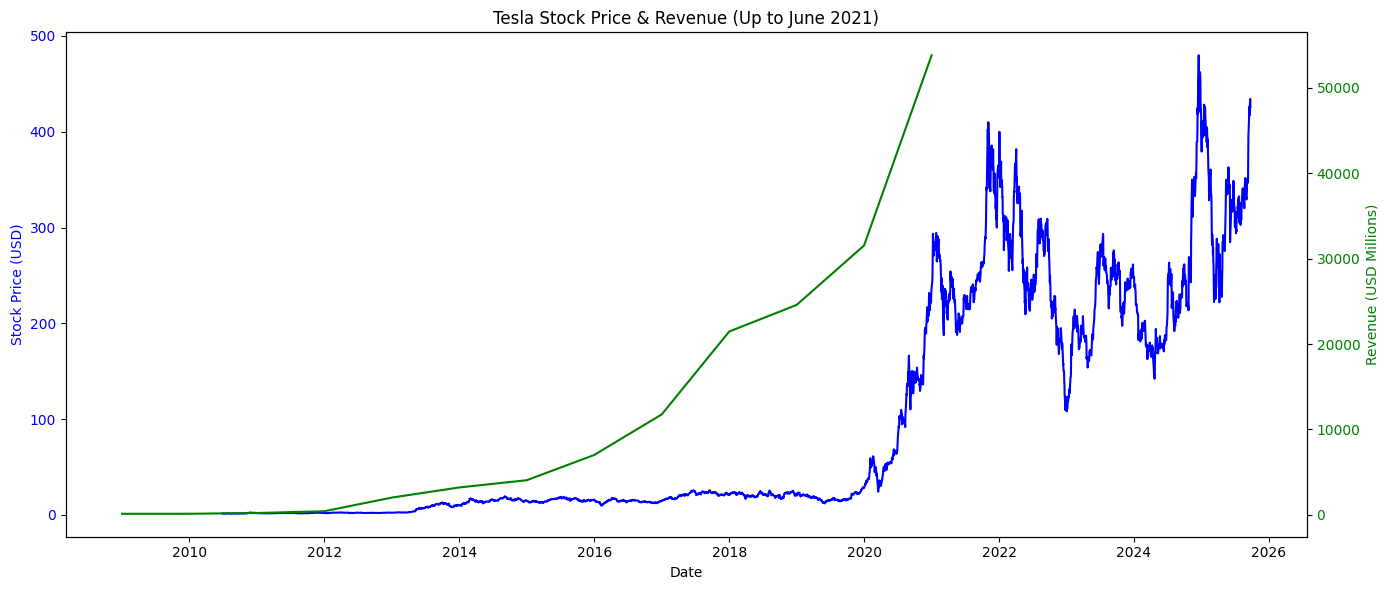

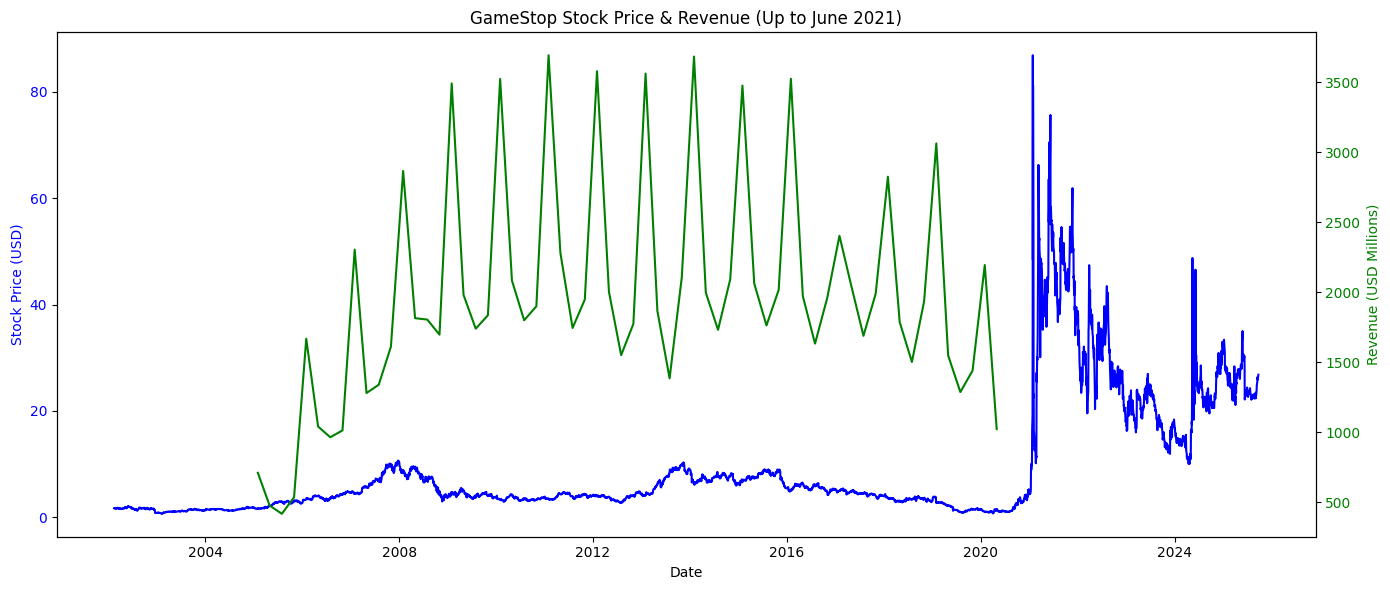

In [36]:
# Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")

# GameStop
make_graph(gme_data, gme_revenue, "GameStop")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
